### 1. Frame the problem and look at the big picture
The problem of Home Credit Default Risk: People with low or non-existing credit histories are taken advantage of by untrustworthy lenders. To determine whether an applicant of a loan will be able to repay it. We will be using supervised learning because we have many attributes inputs and outputs a boolean value to determine if they will repay their loan. Our model will learn from this data and predict whether or not the applicants will pay their loan. By using classification.

We have a binary variable("TARGET"), 0 and 1. 0 if they will pay the loan in time, and 1 will have problems paying the loan. The performance will be measured by looking at the accuracy of our data compared to the test set.

The performance measure is a good guidance for giving out loans. With new appliers, bankers could use the solution if its good enough, and reconsider with their own expertise. The minimum performance should be on the same level as human expertise to be used for reaching the business objective. There need to be expertise from bankers to approve wether an applier should get a loan or not. We assume that the results has a combination with age, annually income, other loans, type of loans, credit values. We will look at these values in the data set.

##### Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import gc
import itertools
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from hyperopt import tpe, fmin, hp, Trials, STATUS_OK
import lightgbm as lgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import gc

### Explore the data
In order to better the score, we will have to include more information from the train dataset and the test dataset through a manual feature engineering on the train and test datasets

In [2]:
#Training data and test data
train_data = pd.read_csv('application_train.csv')
test_data = pd.read_csv('application_test.csv')
print('Training data dimensions: ', train_data.shape)

Training data dimensions:  (307511, 122)


In [3]:
train_data.head()
train_data['DAYS_EMPLOYED_PERC'] = train_data['DAYS_EMPLOYED'] / train_data['DAYS_BIRTH']
train_data['INCOME_CREDIT_PERC'] = train_data['AMT_INCOME_TOTAL'] / train_data['AMT_CREDIT']
train_data['INCOME_PER_PERSON'] = train_data['AMT_INCOME_TOTAL'] / train_data['CNT_FAM_MEMBERS']
train_data['ANNUITY_INCOME_PERC'] = train_data['AMT_ANNUITY'] / train_data['AMT_INCOME_TOTAL']
train_data['PAYMENT_RATE'] = train_data['AMT_ANNUITY'] / train_data['AMT_CREDIT']
train_data['LOAN_INCOME_RATIO'] =train_data['AMT_CREDIT'] / train_data['AMT_INCOME_TOTAL']
train_data['ANNUITY_INCOME_RATIO'] = train_data['AMT_ANNUITY'] / train_data['AMT_INCOME_TOTAL']
train_data['ANNUITY LENGTH'] = train_data['AMT_CREDIT'] / train_data['AMT_ANNUITY']
train_data['WORKING_LIFE_RATIO'] = train_data['DAYS_EMPLOYED'] / train_data['DAYS_BIRTH']
train_data['INCOME_PER_FAM'] = train_data['AMT_INCOME_TOTAL'] / train_data['CNT_FAM_MEMBERS']
train_data['CHILDREN_RATIO'] = train_data['CNT_CHILDREN'] / train_data['CNT_FAM_MEMBERS']


test_data['DAYS_EMPLOYED_PERC'] = test_data['DAYS_EMPLOYED'] / test_data['DAYS_BIRTH']
test_data['INCOME_CREDIT_PERC'] = test_data['AMT_INCOME_TOTAL'] / test_data['AMT_CREDIT']
test_data['INCOME_PER_PERSON'] = test_data['AMT_INCOME_TOTAL'] / test_data['CNT_FAM_MEMBERS']
test_data['ANNUITY_INCOME_PERC'] = test_data['AMT_ANNUITY'] / test_data['AMT_INCOME_TOTAL']
test_data['PAYMENT_RATE'] = test_data['AMT_ANNUITY'] / test_data['AMT_CREDIT']
test_data['LOAN_INCOME_RATIO'] = test_data['AMT_CREDIT'] / test_data['AMT_INCOME_TOTAL']
test_data['ANNUITY_INCOME_RATIO'] = test_data['AMT_ANNUITY'] / test_data['AMT_INCOME_TOTAL']
test_data['ANNUITY LENGTH'] = test_data['AMT_CREDIT'] / test_data['AMT_ANNUITY']
test_data['WORKING_LIFE_RATIO'] = test_data['DAYS_EMPLOYED'] / test_data['DAYS_BIRTH']
test_data['INCOME_PER_FAM'] = test_data['AMT_INCOME_TOTAL'] / test_data['CNT_FAM_MEMBERS']
test_data['CHILDREN_RATIO'] = test_data['CNT_CHILDREN'] / test_data['CNT_FAM_MEMBERS']

We initially tried to include the following variables in the model but after seeing that the score did not improve by including them we decided to remove them

In [ ]:
# train_data['NEW_CREDIT_TO_GOODS_RATIO'] = train_data['AMT_CREDIT'] / train_data['AMT_GOODS_PRICE']
# train_data['NEW_INC_PER_CHLD'] = train_data['AMT_INCOME_TOTAL'] / (1 + train_data['CNT_CHILDREN'])
# train_data['NEW_EMPLOY_TO_BIRTH_RATIO'] = train_data['DAYS_EMPLOYED'] / train_data['DAYS_BIRTH']
# train_data['NEW_ANNUITY_TO_INCOME_RATIO'] = train_data['AMT_ANNUITY'] / (1 + train_data['AMT_INCOME_TOTAL'])
# train_data['NEW_SOURCES_PROD'] =train_data['EXT_SOURCE_1'] * train_data['EXT_SOURCE_2'] * train_data['EXT_SOURCE_3']
# train_data['NEW_EXT_SOURCES_MEAN'] = train_data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
# train_data['NEW_SCORES_STD'] = train_data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
# train_data['NEW_SCORES_STD'] = train_data['NEW_SCORES_STD'].fillna(train_data['NEW_SCORES_STD'].mean())
# train_data['NEW_CAR_TO_BIRTH_RATIO'] = train_data['OWN_CAR_AGE'] / train_data['DAYS_BIRTH']
# train_data['NEW_CAR_TO_EMPLOY_RATIO'] = train_data['OWN_CAR_AGE'] / train_data['DAYS_EMPLOYED']
# train_data['NEW_PHONE_TO_BIRTH_RATIO'] = train_data['DAYS_LAST_PHONE_CHANGE'] / train_data['DAYS_BIRTH']
# train_data['NEW_PHONE_TO_BIRTH_RATIO_EMPLOYER'] = train_data['DAYS_LAST_PHONE_CHANGE'] /train_data['DAYS_EMPLOYED']
# train_data['NEW_CREDIT_TO_INCOME_RATIO'] = train_data['AMT_CREDIT'] / train_data['AMT_INCOME_TOTAL']

In [46]:
# test_data['NEW_CREDIT_TO_GOODS_RATIO'] = test_data['AMT_CREDIT'] / test_data['AMT_GOODS_PRICE']
# test_data['NEW_INC_PER_CHLD'] = test_data['AMT_INCOME_TOTAL'] / (1 + test_data['CNT_CHILDREN'])
# test_data['NEW_EMPLOY_TO_BIRTH_RATIO'] = test_data['DAYS_EMPLOYED'] / test_data['DAYS_BIRTH']
# test_data['NEW_ANNUITY_TO_INCOME_RATIO'] = test_data['AMT_ANNUITY'] / (1 + test_data['AMT_INCOME_TOTAL'])
# test_data['NEW_SOURCES_PROD'] =test_data['EXT_SOURCE_1'] * test_data['EXT_SOURCE_2'] * test_data['EXT_SOURCE_3']
# test_data['NEW_EXT_SOURCES_MEAN'] = test_data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
# test_data['NEW_SCORES_STD'] = test_data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
# test_data['NEW_SCORES_STD'] = test_data['NEW_SCORES_STD'].fillna(test_data['NEW_SCORES_STD'].mean())
# test_data['NEW_CAR_TO_BIRTH_RATIO'] = test_data['OWN_CAR_AGE'] / test_data['DAYS_BIRTH']
# test_data['NEW_CAR_TO_EMPLOY_RATIO'] = test_data['OWN_CAR_AGE'] / test_data['DAYS_EMPLOYED']
# test_data['NEW_PHONE_TO_BIRTH_RATIO'] = test_data['DAYS_LAST_PHONE_CHANGE'] / test_data['DAYS_BIRTH']
# test_data['NEW_PHONE_TO_BIRTH_RATIO_EMPLOYER'] = test_data['DAYS_LAST_PHONE_CHANGE'] /test_data['DAYS_EMPLOYED']
# test_data['NEW_CREDIT_TO_INCOME_RATIO'] = test_data['AMT_CREDIT'] / test_data['AMT_INCOME_TOTAL']

Now we define a method that allows us to check the missing values in our data: missing data, or missing values, occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.

Missing data can occur because of nonresponse: no information is provided for one or more items or for a whole unit ("subject"). Some items are more likely to generate a nonresponse than others: for example items about private subjects such as income.

In [4]:
def missing_values(dataframe):
    #Sum of total missing values
    mis_val = dataframe.isnull().sum() #count the null-values in the dataframe
    
    #Percentage of the sum
    per_val = 100 * mis_val / len(dataframe)
    
    #Visualize the results
    tab_val = pd.concat([mis_val, per_val], axis=1) #concatenate the values together
    
    #Name the columns
    mis_val_columns = tab_val.rename(columns = {0 : 'Missing values', 
                                      1 : 'Percent of total values'})
    #Sort the table
    mis_val_columns = mis_val_columns[mis_val_columns.iloc[:,1] != 0].sort_values(
        'Percent of total values', ascending=False).round(1)
    
    #Print information
    print("The selected dataframe has " + str(dataframe.shape[1]) + " columns.\n"
          "There are " + str(mis_val_columns.shape[0]) + " columns that have missing values.")
    
    return mis_val_columns

In this, we exploring the data and checking what into the data and more than this it also ensure about the data types and about the dataframe and how much memory is using and moving futher we need to check the rows and colums of it.

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
train_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
categorical_variable=train_data.describe(include=['O'])
categorical_variable

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


In this, we are going to check the target attibutes and we can check it by the train_data['TARGET'] and then counting the values of this.

In [6]:
train_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

#### What is the distribution of categorical features?
Contract type as two possible values with 90% Cash loans (top=Cash loans, freq=278232/count=307511).

Gender variable as three possible values with 66% female (top=female, freq=202448/count=307511).

Own Car variable as two possible values with 66% "No" (top=N, freq=202924/count=307511).

Own Realty variable as two possible values with 69% "Yes" (top=Y, freq=213312/count=307511).

Suite Type variable as seven possible values with 81% unaccompanied (top=Unaccompanied, freq=248526/count=306219).

Income Type variable as eight possible values with 81% Working (top=Working, freq=248526/count=307511).

Education Type variable as five possible values with 71% unaccompanied (top=Secondary / secondary special, freq=218391/count=307511).

Family status variable as six possible values with 64% "Married" (top=Married, freq=196432/count=307511).

Housing type variable as six possible values with 89% "House / apartment " (top=House / apartment, freq=272868/count=307511).

Occupation type variable as eighteen possible values with 26% "Laborers" (top=Laborers, freq=55186/count=211120).
Weekday aproval process start day variable as seven possible values with 18% "TUESDAY" (top=TUESDAY, freq=53901/count=307511).

Organization type variable as fifty eight possible values with 22% "Business Entity Type 3" (top=Business Entity Type 3, freq=67992/count=307511).

Fondkapremont mode variable as four possible values with 76% "reg oper account" (top=reg oper account, freq=73830/count=97216).

House type variable as three possible values with 98% "block of flats" (top=block of flats, freq=150503/count=153214).

Walls material variable as seven possible values with 44% "Panel" (top=No, freq=66040/count=151170).

Emergency state variable as two possible values with 99% "No" (top=No, freq=159428/count=161756).

# Plotting the data

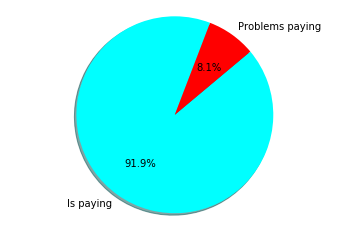

In [7]:
labels = 'Is paying', 'Problems paying'
sizes = [train_data['TARGET'].value_counts()[0],train_data['TARGET'].value_counts()[1]]
colors = ['cyan', 'red']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=69)
plt.axis('equal')
plt.show()

### 91.9% repayers, and 8.1% defaulters. 

## Data Cleaning

Here, we going through the missing values to make the model good and data cleaning is the most important part of the machine learning and that makes the things easy and clean

In [8]:
missing_values = missing_values(train_data)
missing_values.head(10)

The selected dataframe has 133 columns.
There are 74 columns that have missing values.


,Missing values,Percent of total values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4


In [9]:
def missing_values(df):
    total_missing = df.isnull().sum()/df.shape[0]
    percent_missing = total_missing*100
    return percent_missing.sort_values(ascending=False).round(1)

In [10]:
missing_values = missing_values(train_data)

In [11]:
missing_values = pd.DataFrame({'columns': missing_values.index, 'missing percent': missing_values.values})
drop_columns = missing_values[missing_values['missing percent'] >= 40]['columns'].tolist()
drop_columns

['COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'COMMONAREA_MEDI',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MODE',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MODE',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MODE',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MODE',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'ELEVATORS_AVG',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MODE',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'ENTRANCES_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_AVG',
 'HOUSETYPE_MODE',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION

Every column has over 40 percent missing values. we need to look at the data and find correlations to the target value before removing it.

## Data Visualization

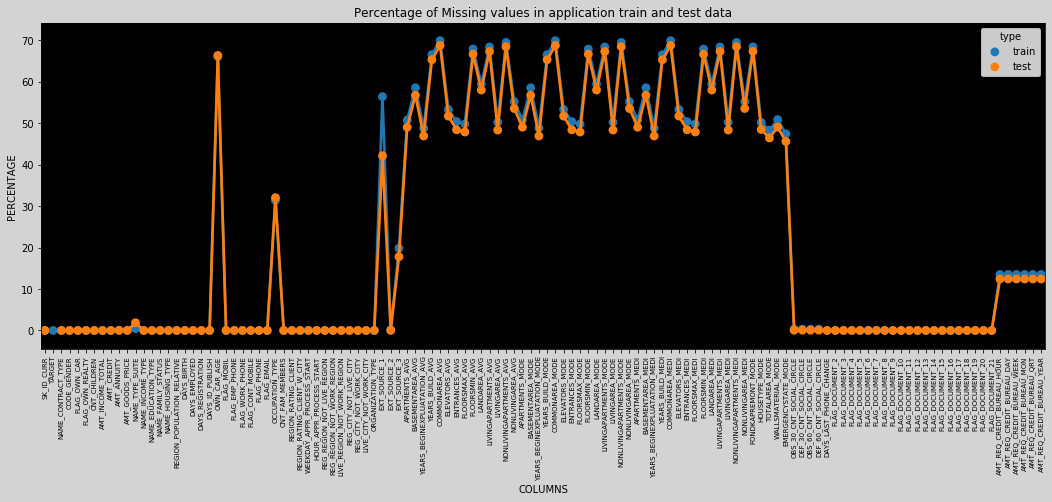

In [15]:
fig = plt.figure(figsize=(18,6))
miss_train = pd.DataFrame((train_data.isnull().sum())*100/train_data.shape[0]).reset_index()
miss_test = pd.DataFrame((test_data.isnull().sum())*100/test_data.shape[0]).reset_index()
miss_train["type"] = "train"
miss_test["type"]  =  "test"
missing = pd.concat([miss_train,miss_test],axis=0)
ax = sns.pointplot("index",0,data=missing,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application train and test data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

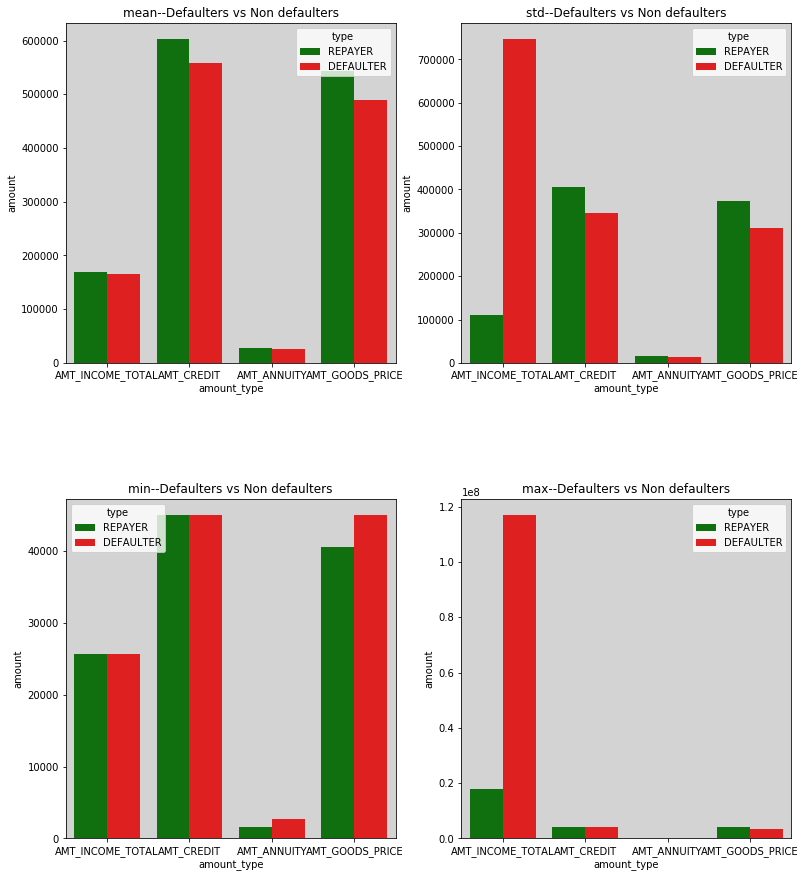

In [16]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']

df = train_data.groupby("TARGET")[cols].describe().transpose().reset_index()
df = df[df["level_1"].isin([ 'mean', 'std', 'min', 'max'])] 
df_x = df[["level_0","level_1",0]]
df_y = df[["level_0","level_1",1]]
df_x = df_x.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 0:"amount"})
df_x["type"] = "REPAYER"
df_y = df_y.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 1:"amount"})
df_y["type"] = "DEFAULTER"
df_new = pd.concat([df_x,df_y],axis = 0)

stat = df_new["statistic"].unique().tolist()
length = len(stat)

plt.figure(figsize=(13,15))

for i,j in itertools.zip_longest(stat,range(length)):
    plt.subplot(2,2,j+1)
    fig = sns.barplot(df_new[df_new["statistic"] == i]["amount_type"],df_new[df_new["statistic"] == i]["amount"],
                hue=df_new[df_new["statistic"] == i]["type"],palette=["g","r"])
    plt.title(i + "--Defaulters vs Non defaulters")
    plt.subplots_adjust(hspace = .4)
    fig.set_facecolor("lightgrey")

Income for defaulters are just below than the repayers

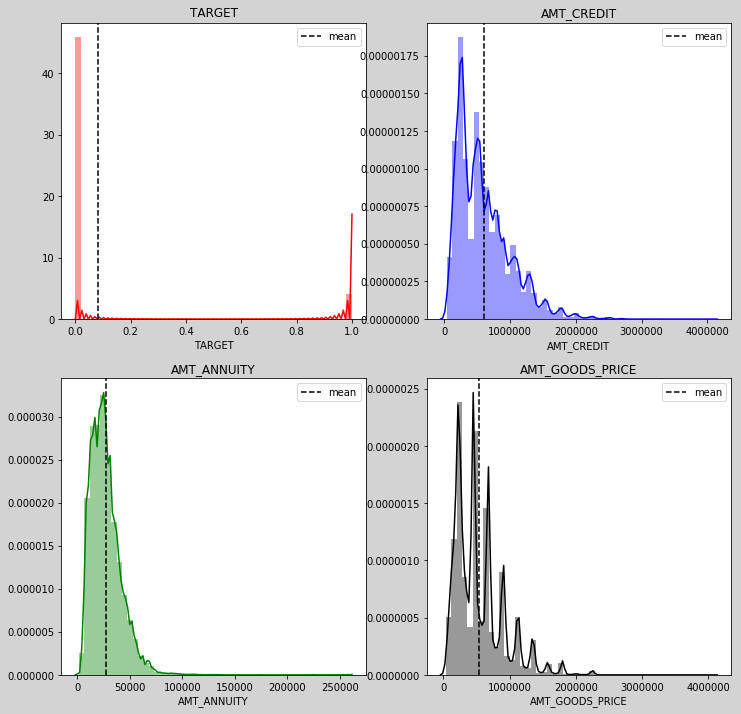

In [16]:
cols = [ 'TARGET', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']
length = len(cols)
cs = ["r","b","g","k"]

ax = plt.figure(figsize=(12,12))
ax.set_facecolor("lightgrey")
for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(2,2,j+1)
    sns.distplot(train_data[train_data[i].notnull()][i],color=k)
    plt.axvline(train_data[i].mean(),label = "mean",linestyle="dashed",color="k")
    plt.legend(loc="best")
    plt.title(i)
    plt.subplots_adjust(hspace = .2)

# Visualization of Data 

In [17]:
def barchart(df,variable):

    sns.set(style="darkgrid")

    base_color = sns.color_palette()[0]

    order = df[variable].value_counts().index

    sns.countplot(data = df, x = variable, hue=variable, color = base_color, order = order , palette="Set3")

In [18]:
def catplot_WTARGET(df,variable,TARGET):

    sns.set(style="darkgrid")

    base_color = sns.color_palette()[0]

    order = df[variable].value_counts().index

    sns.catplot(data = df, x = variable, hue=variable, color = base_color,  kind="count",  palette="Set3", col=TARGET, height=4, aspect=.7)

In [19]:
def piechart(df,variable):

    sorted_counts = df[variable].value_counts()

    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 100,

    counterclock = False, wedgeprops = {'width' : 0.4},  radius=1.5);

    plt.axis('square')

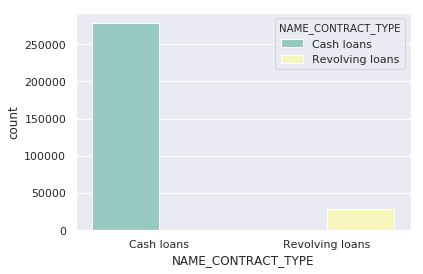

In [21]:
barchart(train_data,'NAME_CONTRACT_TYPE')

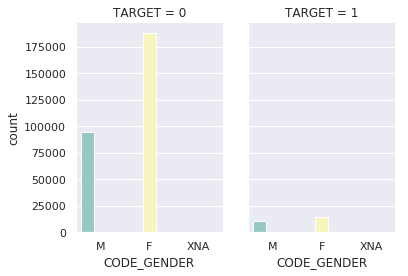

In [22]:
catplot_WTARGET(train_data,'CODE_GENDER','TARGET')

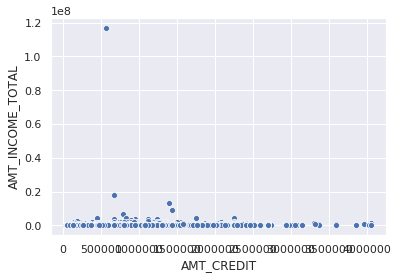

In [29]:
sns.scatterplot(x="AMT_CREDIT", y="AMT_INCOME_TOTAL" , data=train_data)

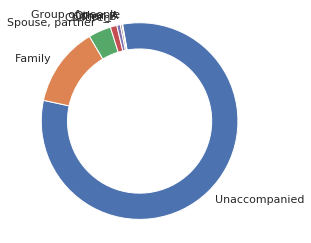

In [31]:
piechart(train_data,'NAME_TYPE_SUITE')

##  Attributes Correlations

A correlation is a number between -1 and +1 that measures the degree of association between two Attributes (call them X and Y). A positive value for the correlation implies a positive association. In this case large values of X tend to be associated with large values of Y and small values of X tend to be associated with small values of Y. A negative value for the correlation implies a negative or inverse association. In this case large values of X tend to be associated with small values of Y and vice versa.

Data correlation is the way in which one set of data may correspond to another set. In Machine Learning, think of how your features correspond with your output.

For correlations we are dropping missing values and sees which columns needs to remove

In [17]:
corr_matrix = train_data.corr()['TARGET'].sort_values(ascending=False)

In [18]:
print('Most Positive Correlations:\n', corr_matrix.head(15))
print('\nMost Negative Correlations:\n', corr_matrix.tail(15))

Most Positive Correlations:
 TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
Name: TARGET, dtype: float64

Most Negative Correlations:
 LIVINGAREA_MEDI              -0.032739
LIVINGAREA_AVG               -0.032997
FLOORSMIN_MEDI               -0.033394
FLOORSMIN_AVG                -0.033614
ELEVATORS_MEDI               -0.033863
ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645


days_birth and target is the highest positive correlation. 
days_birth has negative value.

In [19]:
test_data['DAYS_BIRTH'] = abs(test_data['DAYS_BIRTH'])

train_data['DAYS_BIRTH'] = abs(train_data['DAYS_BIRTH'])
train_data['DAYS_BIRTH'].corr(train_data['TARGET'])

-0.07823930830982712

Negative correlation is comes in between target and days birth. more older client more need to pay.

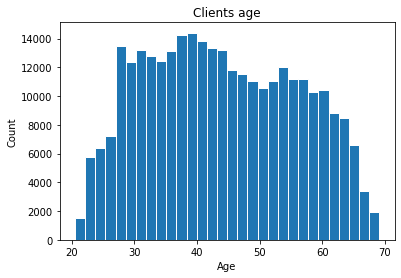

In [20]:
plt.hist(train_data['DAYS_BIRTH'] / 365, edgecolor='white', bins= 30)
plt.title('Clients age');
plt.xlabel('Age');
plt.ylabel('Count');

## Kernel density plot

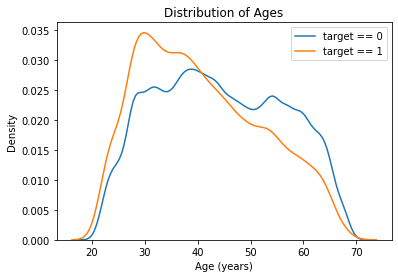

In [21]:
sns.kdeplot(train_data.loc[train_data['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')
sns.kdeplot(train_data.loc[train_data['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

plt.xlabel('Age (years)');
plt.ylabel('Density');
plt.title('Distribution of Ages');

The age somewhere around 40 then it has more problems in paying loans, while moving ahead if the clients has over 40 then it has even more evenly distributed.

## Separation of data

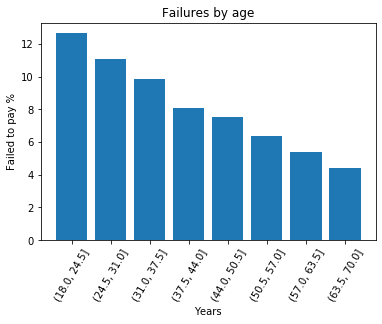

In [22]:
age_data = train_data[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
#store in 7 years span
age_data['YEARS_SPAN'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(18, 70, num = 9))

age_group = age_data.groupby('YEARS_SPAN').mean()

plt.bar(age_group.index.astype(str), 100 * age_group['TARGET'])

plt.xticks(rotation = 60);
plt.xlabel('Years');
plt.ylabel('Failed to pay %');
plt.title('Failures by age');

Replaying tension is less if person is less and it gradually increase as in the increase in the age

In [23]:
ext_data = train_data[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


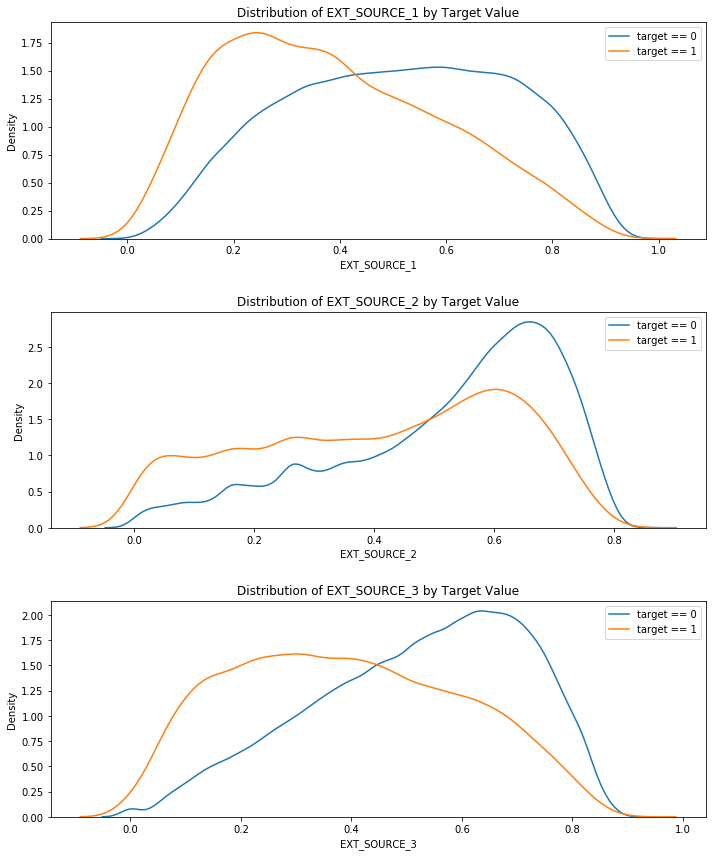

In [24]:
plt.figure(figsize = (10, 12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    plt.subplot(3, 1, i + 1)
    sns.kdeplot(train_data.loc[train_data['TARGET'] == 0, source], label = 'target == 0')
    sns.kdeplot(train_data.loc[train_data['TARGET'] == 1, source], label = 'target == 1')
    
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

The correlation between external sources 1-3 failure to pay.

# 4. Data Preparation

## Dropping the missing values

In [12]:
ext1train_data = train_data['EXT_SOURCE_1']
ext1test_data = test_data['EXT_SOURCE_1']

In [13]:
print(train_data.shape)
print(test_data.shape)

(307511, 133)
(48744, 132)


### Datatypes

Identifying the columns and the data types so we can able to perform action on it

In [14]:
train_data.dtypes.value_counts()

float64    76
int64      41
object     16
dtype: int64

In [15]:
train_data.select_dtypes('object').apply(pd.Series.nunique,axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [16]:
train_data['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
test_data['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)

## Categorical Variables Encoding

### LabelEncoder for unique categories

LabelEncoder under 2 unique categories:
We have to encode the categorical values for our machine learning model to understand the data it is given, when there is only 2 or less unique categories, we can easily use a LabelEncoder to lable them into 1 and 0. below this we will use OneHotEncoder for object data with more than 2 categorical values

In [17]:
encoder = LabelEncoder()
count = 0

for col in train_data:
    if train_data[col].dtype == 'object': 
        
        if len(list(train_data[col].unique())) <= 2:
            
            encoder.fit(train_data[col])
            train_data[col] = encoder.transform(train_data[col])
            test_data[col] = encoder.transform(test_data[col])
            
            count += 1
        
print(str(count) + ' columns were label encoded.')

3 columns were label encoded.


## OneHotEncoder for unique categories

This function(getDummies) will modify the dataframe. When we have more instances then we have there lots of categorical feature with 100s of categories. Increase of columns after the getDummies will be called in our training set and test set.

In [35]:
def dummy(df, categories):
    for col in categories:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    return df 

### Objects in columns 

In [18]:
train_data = pd.get_dummies(train_data, dummy_na= True)
test_data = pd.get_dummies(test_data, dummy_na= True)


print(train_data.shape, test_data.shape)

(307511, 267) (48744, 263)


## train & test

The getDummies method we applied to both the training and test data has sqewered the shape of test and train data. with test having 178 columns and train having 182 columns.

In [19]:
train_labels = train_data['TARGET']

train_data, test_data = train_data.align(test_data, join = 'inner', axis = 1)

train_data['TARGET'] = train_labels

print('Training Features shape: ', train_data.shape)
print('Testing Features shape: ', test_data.shape)

Training Features shape:  (307511, 264)
Testing Features shape:  (48744, 263)


The only difference is that the test set does not include the target column, which is how we want it.

In [20]:
print('Training Features shape: ', train_data.shape, test_data.shape)

Training Features shape:  (307511, 264) (48744, 263)


## Understanding the data

We have to decide if we want to keep the anomalities or change them to the median/mean values of that feature.
We start by looking at count children. 

In [21]:
train_data['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

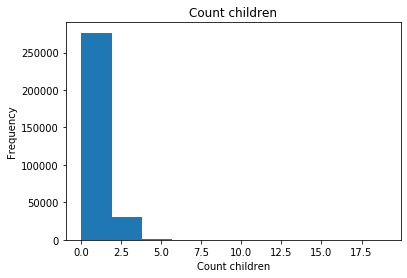

In [22]:
train_data['CNT_CHILDREN'].plot.hist(title = 'Count children');
plt.xlabel('Count children');

In [23]:
anom = train_data[train_data['CNT_CHILDREN'] >= 15]
non_anom = train_data[train_data['CNT_CHILDREN'] != 19]
print('The non anomalies default on %0.2f%% of counts' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of counts' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous children counts' % len(anom))

The non anomalies default on 8.07% of counts
The anomalies default on 0.00% of counts
There are 2 anomalous children counts


The impact on the model by the significant 15 students anamalies

Here, we are going through the feature that can impact these model.

In [56]:
train_data['DAYS_EMPLOYED'].describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

In [24]:
anom = train_data[train_data['DAYS_EMPLOYED'] == 365243]
non_anom = train_data[train_data['DAYS_EMPLOYED'] != 365243]
print('The non anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non anomalies default on 8.07% of loans
The anomalies default on nan% of loans
There are 0 anomalous days of employment


changed to boolean and then nan to the some number

### replacing anomalities

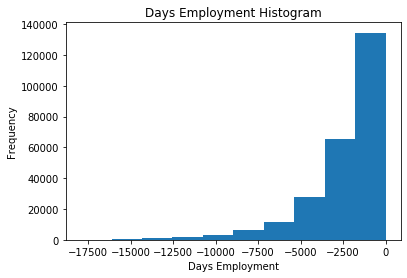

In [25]:
train_data['DAYS_EMPLOYED_ANOM'] = train_data["DAYS_EMPLOYED"] == 365243
train_data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
train_data['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [26]:
test_data['DAYS_EMPLOYED_ANOM'] = test_data["DAYS_EMPLOYED"] == 365243

test_data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (test_data['DAYS_EMPLOYED_ANOM'].sum(), len(test_data)))

There are 0 anomalies in the test data out of 48744 entries


In [27]:
train_data.isnull().sum().values

array([     0,      0,      0,      0,      0,      0,      0,     12,
          278,      0,      0,  55374,      0,      0, 202929,      0,
            0,      0,      0,      0,      0,      2,      0,      0,
            0,      0,      0,      0,      0,      0,      0, 173378,
          660,  60965, 156061, 179943, 150007, 204488, 214865, 163891,
       154828, 153020, 208642, 182590, 210199, 154350, 213514, 169682,
       156061, 179943, 150007, 204488, 214865, 163891, 154828, 153020,
       208642, 182590, 210199, 154350, 213514, 169682, 156061, 179943,
       150007, 204488, 214865, 163891, 154828, 153020, 208642, 182590,
       210199, 154350, 213514, 169682, 148431,   1021,   1021,   1021,
         1021,      1,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,  41519,  41519,
        41519,  41519,  41519,  41519,      0,      0,      2,     12,
      

## Figuring out missing values

Changing NAN to medium

In [28]:
median_test = np.median(test_data['DAYS_EMPLOYED'])
median_train = np.median(train_data['DAYS_EMPLOYED'])

In [29]:
train_data['DAYS_EMPLOYED'].replace({np.nan: median_train}, inplace = True)
test_data['DAYS_EMPLOYED'].replace({np.nan: median_test}, inplace = True)

NaN in the direction of the median of Y column

We have replaced every object or Nan into numbers, so that we can train the models.

## Implementing Polynomial Features

Making the three least correlated features and the most correlated feature towards target a new dataframe. We impute the data to assure that every value converts to the median. We will construct polynomial features. these features will capture the interaction between variables. This is done so that we will not miss any data that may have av bigger impact on the target than we think. Because while two variables may no have a strong effect on the target value, combining them will prehaps show a more correlating factor on the target value.

In [30]:
train_data['EXT_SOURCE_1'] = ext1train_data
test_data['EXT_SOURCE_1'] = ext1test_data

#### Impute missing values

In [31]:
poly_features = train_data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = test_data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

                                  
poly_transformer = PolynomialFeatures(degree = 3)

#### Train &transforming features

In [32]:
poly_transformer.fit(poly_features)
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


Created a total of 35 polynomial features.

#### Display highest negative and highest positive

In [33]:
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

poly_features['TARGET'] = poly_target

poly_corrs = poly_features.corr()['TARGET'].sort_values()

print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
Name: TARGET, dtype: float64
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH    0.155891
EXT_SOURCE_2 DAYS_BIRTH                 0.156873
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.181283
TARGET                                  1.000000
1                                            NaN
Name: TARGET, dtype: float64


Here we can see that some of the correlations are greater than ones we had before. This means that these are important factors to consider when training our model and we will append these values to our original tabel, both test and train. Note for future developing of the data is to prehaps look at more polynomial variables to see if there are more combinations of variables that has similar levels of correlation.

#### features into dataframe

In [34]:
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

poly_features['SK_ID_CURR'] = train_data['SK_ID_CURR']
train_poly = train_data.merge(poly_features, on = 'SK_ID_CURR', how = 'left')
poly_features_test['SK_ID_CURR'] = test_data['SK_ID_CURR']
test_poly = test_data.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')
train_poly, test_poly = train_poly.align(test_poly, join = 'inner', axis = 1)
print('Training data with polynomial features shape: ', train_poly.shape)
print('Testing data with polynomial features shape:  ', test_poly.shape)

Training data with polynomial features shape:  (307511, 299)
Testing data with polynomial features shape:   (48744, 299)


Now our table has a total of 215 coulms from 120 

Before to train the model we have to clean our data through a method that help us to remove values that are NaN, infinite or too large for our model:

In [40]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep]

In [36]:
def categorical(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return feats

#tthis function extracts categorical features from the dataset

In [37]:
#POS CASH 
pos = pd.read_csv('POS_CASH_balance.csv', nrows = None)
pos = pd.concat([pos, pd.get_dummies(pos['NAME_CONTRACT_STATUS'], prefix='NAME_CONTRACT_STATUS')], axis=1)
pos_cats = categorical(pos)
pos = dummy(pos, pos_cats)
pos['CNT_INSTALMENT']/=10
pos['CNT_INSTALMENT_FUTURE']/=10
del pos['NAME_CONTRACT_STATUS']

pos_count = pos[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
pos['SK_ID_PREV'] = pos['SK_ID_CURR'].map(pos_count['SK_ID_PREV'])

## median Values for all other variables in pos cash
medianpos= pos.groupby('SK_ID_CURR').median()
train_data = train_data.merge(right=medianpos.reset_index(), how='left', on='SK_ID_CURR')
test_data  = test_data.merge(right=medianpos.reset_index(), how='left', on='SK_ID_CURR')


del medianpos, pos
gc.collect()




6227

In [38]:
#bureau
bureau_data = pd.read_csv('bureau.csv', nrows = None)
bureau_balance_data = pd.read_csv('bureau_balance.csv', nrows = None)
bureau_cats = categorical(bureau_data)
bureau_b_cats = categorical(bureau_balance_data)

bureau = dummy(bureau_data,bureau_cats)
bureau_balance_data = dummy(bureau_balance_data,bureau_b_cats)

bureau_data['LOAN_RATE'] = bureau_data['AMT_ANNUITY'] / bureau_data['AMT_CREDIT_SUM']

# median values for bureau features
medianbureau=bureau_data.groupby('SK_ID_CURR').median()
medianbureau['median_bureau'] = bureau_data[['SK_ID_BUREAU','SK_ID_CURR']].groupby('SK_ID_CURR').count()['SK_ID_BUREAU']
medianbureau.columns = ['a_' + f_ for f_ in medianbureau.columns]
train_data = train_data.merge(right=medianbureau.reset_index(), how='left', on='SK_ID_CURR')
test_data= test_data.merge(right=medianbureau.reset_index(), how='left', on='SK_ID_CURR')

#df.head()
del bureau_balance_data, medianbureau
gc.collect()

0

In [41]:
prev_app= pd.read_csv('previous_application.csv', nrows = None)

# A lot of the continuous days variables have integers as missing value indicators.
prev_app['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
prev_app['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)
prev_app['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)
prev_app['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
prev_app['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)

prev_app_cats = categorical(prev_app)
prev_app = dummy(prev_app, prev_app_cats)

prev_app['APP_CREDIT_PERC'] = prev_app['AMT_APPLICATION'] / prev_app['AMT_CREDIT']

medianprevious=prev_app.groupby('SK_ID_CURR').median()
medianprevious['median_prev'] = prev_app[['SK_ID_PREV','SK_ID_CURR']].groupby('SK_ID_CURR').count()['SK_ID_PREV']
medianprevious.columns = ['b_' + f_ for f_ in medianprevious.columns]


train_data = train_data.merge(right=clean_dataset(medianprevious.reset_index()), how='left', on='SK_ID_CURR')
test_data= test_data.merge(right=clean_dataset(medianprevious.reset_index()), how='left', on='SK_ID_CURR')

del medianprevious, prev_app
gc.collect()

inst = pd.read_csv('installments_payments.csv')
inst['DAYS_ENTRY_PAYMENT_weighted'] = inst['DAYS_ENTRY_PAYMENT'] * inst['AMT_PAYMENT']

inst_cats = categorical(inst)
inst = dummy(inst, inst_cats)

inst['DAYS_ENTRY_PAYMENT'] = inst['DAYS_ENTRY_PAYMENT_weighted']/inst['AMT_PAYMENT']
inst['AMT_PAYMENT_PERC'] = inst['AMT_PAYMENT'] / (1+inst['AMT_INSTALMENT'])
inst['DAYS_ENTRY_PAYMENT_weighted'] = inst['DAYS_ENTRY_PAYMENT'] * inst['AMT_PAYMENT']
inst['PAYMENT_PERC'] = inst['AMT_PAYMENT'] / inst['AMT_INSTALMENT']

inst_count = inst[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()

## median values for all other variables in installments payments
median_inst= inst.groupby('SK_ID_CURR').mean()
median_inst.columns = ['i_' + f_ for f_ in median_inst.columns]
train_data = train_data.merge(right=clean_dataset(median_inst.reset_index()), how='left', on='SK_ID_CURR')
test_data= test_data.merge(right=clean_dataset(median_inst.reset_index()), how='left', on='SK_ID_CURR')

del inst, median_inst
gc.collect()



credit_card_data = pd.read_csv('credit_card_balance.csv', nrows = None)

credit_cats = categorical(credit_card_data)
credit_card_data = dummy(credit_card_data, credit_cats)

credit_card_data['OVER_LIMIT'] = credit_card_data['AMT_BALANCE'] > credit_card_data['AMT_CREDIT_LIMIT_ACTUAL']
credit_card_data['BALANCE_CLEARED'] = credit_card_data['AMT_BALANCE'] == 0.0
credit_card_data['LOW_PAYMENT'] = credit_card_data['AMT_PAYMENT_CURRENT'] < credit_card_data['AMT_INST_MIN_REGULARITY']

## median values for all other variables in installments payments
median_credit= credit_card_data.groupby('SK_ID_CURR').mean()
median_credit.columns = ['i_' + f_ for f_ in median_credit.columns]
train_data = train_data.merge(right=clean_dataset(median_credit.reset_index()), how='left', on='SK_ID_CURR')
test_data= test_data.merge(right=clean_dataset(median_credit.reset_index()), how='left', on='SK_ID_CURR')

del credit_card_data, median_credit
gc.collect()

0

### LightGBM

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages: Faster training speed and higher efficiency.

Fitting the model and Predicting

In [42]:
folds = KFold(n_splits=8, shuffle=True, random_state=2020)

In [43]:
preds = np.zeros(train_data.shape[0]) #to store the results
sub_preds = np.zeros(test_data.shape[0])

train_data.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in train_data.columns]#lightbost has a problem with Json name lol
test_data.columns= ["".join (c if c.isalnum() else "_" for c in str(x)) for x in test_data.columns]

importantfeat = pd.DataFrame()
feats = [f for f in train_data.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]

In [44]:
for train_indices, valid_indices in folds.split(train_data[feats],train_data['TARGET']):
        
    # Training data for the fold
    
    train_features, train_labels = train_data[feats].iloc[train_indices], train_data['TARGET'].iloc[train_indices]
    # Validation data for the fold
    valid_features, valid_labels = train_data[feats].iloc[valid_indices], train_data['TARGET'].iloc[valid_indices]
        
    #'goss’ means Gradient-based One-Side Sampling
    
    model = LGBMClassifier(boosting_type='goss', objective = 'binary', 
                                   learning_rate =0.005134, silent=-1,
                                   min_split_gain= 0.024766, subsample_for_bin=240000,
                                   n_estimators= 10000, verbose=-1, is_unbalance= False,
                                   reg_alpha = 0.436193, reg_lambda = 0.479169, 
                                   colsample_bytree= 0.508716, num_leaves= 54,
                                   subsample = 1, n_jobs = -1, random_state = 50, max_depth=10)

    model.fit(train_features, train_labels, eval_metric = 'auc',
                eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                eval_names = ['valid', 'train'],
                early_stopping_rounds = 100, verbose = 200)
    
    preds[valid_indices] = model.predict_proba(valid_features, num_iteration=model.best_iteration_)[:, 1]
    sub_preds += model.predict_proba(test_data[feats], num_iteration=model.best_iteration_)[:, 1] / folds.n_splits

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = feats
    importantfeat = pd.concat([importantfeat, fold_importance_df], axis=0)
    del model, train_features, train_labels, valid_features, valid_labels
    gc.collect()

print('Full AUC score %.6f' % roc_auc_score(train_data['TARGET'], preds))

Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.771886	train's binary_logloss: 0.253556	valid's auc: 0.758582	valid's binary_logloss: 0.255015
[400]	train's auc: 0.785923	train's binary_logloss: 0.243342	valid's auc: 0.765366	valid's binary_logloss: 0.24727
[600]	train's auc: 0.796186	train's binary_logloss: 0.23745	valid's auc: 0.76942	valid's binary_logloss: 0.243761
[800]	train's auc: 0.805622	train's binary_logloss: 0.233198	valid's auc: 0.772323	valid's binary_logloss: 0.241924
[1000]	train's auc: 0.814185	train's binary_logloss: 0.229665	valid's auc: 0.774613	valid's binary_logloss: 0.240746
[1200]	train's auc: 0.822123	train's binary_logloss: 0.226553	valid's auc: 0.776359	valid's binary_logloss: 0.239922
[1400]	train's auc: 0.829378	train's binary_logloss: 0.223753	valid's auc: 0.777656	valid's binary_logloss: 0.239333
[1600]	train's auc: 0.836007	train's binary_logloss: 0.221164	valid's auc: 0.778732	valid's binary_logloss: 0.238867
[1800]	tr

In [48]:
test_data['TARGET'] = sub_preds
test_data[['SK_ID_CURR', 'TARGET']].to_csv('predictions.csv', index= False)